In [6]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_mask_only
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15 import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "GoGiants1/td-unet15"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(0.4)


input_image = Image.open("./assets/test01.jpeg").convert("RGB").resize((512,512))


""" Change the text in the original image by coordinates and  """

sample_text="CLAY TOY"
# for original_input.jpeg. 110, 500에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[0, 0]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_l',
    checkpoint_path='sam_tss_l_hiertext.pth',
    input_size=input_image.size,
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=input_image.size,
    hier_det=True,
)

out = gen_mask_only(input_image, sample_text=sample_text, choice_list=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)
# out.save(f"./assets/mask_1_out.png") # for debugging
text_mask_image = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(42)
pipe.to("cuda")
output = pipe(
    prompt="a man, poster",
    input_image=input_image,
    text_mask_image=text_mask_image,
    ip_adapter_image = input_image,
    width=512,
    height=512,
    guidance_scale=7,
    generator=generator,
).images[0]



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Freeze image encoder.
<All keys matched successfully>
Freeze image encoder.
<All keys matched successfully>


100%|██████████| 4/4 [00:01<00:00,  2.54it/s]


Mask shape:  (512, 512)


  0%|          | 0/50 [00:00<?, ?it/s]

cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 a

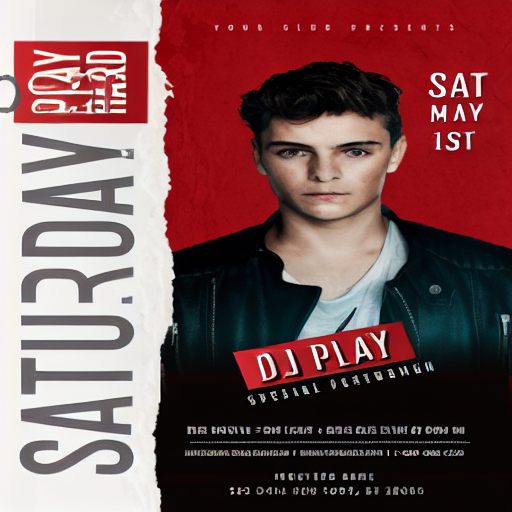

In [7]:
display(output)

# Image to Image

In [1]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_mask_only
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15_img2img import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "GoGiants1/td-unet15"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(0.4)


input_image = Image.open("./assets/test01.jpeg").convert("RGB").resize((512,512))


""" Change the text in the original image by coordinates and  """

sample_text="bear"
# for original_input.jpeg. 110, 500에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[0, 0]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_l',
    checkpoint_path='sam_tss_l_hiertext.pth',
    input_size=input_image.size,
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=input_image.size,
    hier_det=True,
)

out = gen_mask_only(input_image, sample_text=sample_text, choice_list=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)
# out.save(f"./assets/mask_1_out.png") # for debugging
text_mask_image = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(42)
pipe.to("cuda")
output = pipe(
    prompt="a man, poster",
    input_image=input_image,
    text_mask_image=text_mask_image,
    ip_adapter_image = input_image,
    width=512,
    height=512,
    guidance_scale=7,
    generator=generator,
).images[0]



2024-05-25 22:17:04.095712: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 22:17:04.158221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 22:17:04.158266: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 22:17:04.158299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 22:17:04.169996: I tensorflow/core/platform/cpu_feature_g

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Freeze image encoder.
<All keys matched successfully>
Freeze image encoder.
<All keys matched successfully>


/home/s2/mlvu25/anaconda3/envs/tf/lib/python3.10/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/s2/mlvu25/anaconda3/envs/tf/lib/python3.10/site-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


Mask shape:  (512, 512)


  0%|          | 0/50 [00:00<?, ?it/s]

cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 and will be ignored.
cross_attention_kwargs ['ip_adapter_masks'] are not expected by AttnProcessor2_0 a

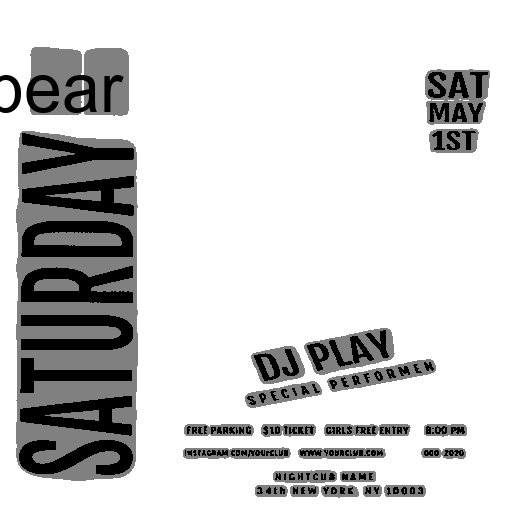

In [4]:
display(out)

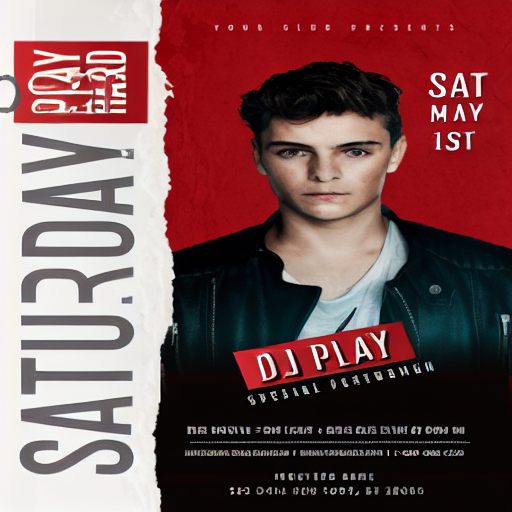

In [5]:
display(output)

# TSS and bbox 



In [27]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_bbox_mask_and_text_stroke_mask
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15 import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "GoGiants1/td-unet15"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(1.0)


input_image = Image.open("./assets/test01.jpeg").convert("RGB").resize((512,512))


""" Change the text in the original image by coordinates and  """

sample_text="Doge Coin"
# for original_input.jpeg. 110, 500에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[256, 256]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_l',
    checkpoint_path='sam_tss_l_hiertext.pth',
    input_size=input_image.size,
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=input_image.size,
    hier_det=True,
)

out, tss = gen_bbox_mask_and_text_stroke_mask(input_image, sample_text=sample_text, choice_list=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)

# out.save(f"./assets/mask_1_out.png") # for debugging
text_mask_image = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)
tss_image = Image.fromarray(tss)
pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(42)
pipe.to("cuda")
output = pipe(
    prompt="a man, poster",
    input_image=input_image,
    text_mask_image=text_mask_image,
    ip_adapter_image=input_image,
    text_stroke_mask=tss,
    width=512,
    height=512,
    guidance_scale=7,
    generator=generator,
).images[0]



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Freeze image encoder.
<All keys matched successfully>
Freeze image encoder.
<All keys matched successfully>


100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


Mask shape:  (512, 512)


  0%|          | 0/50 [00:00<?, ?it/s]

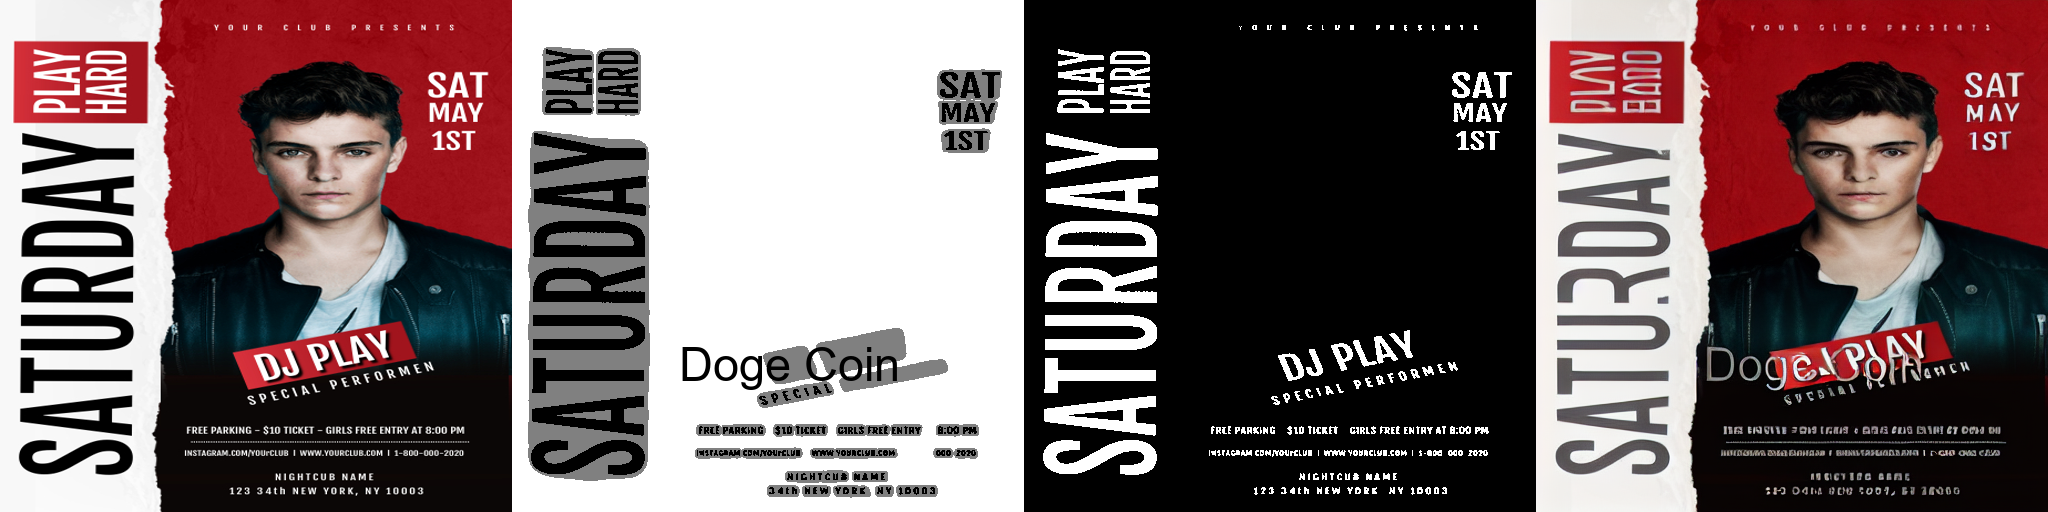

In [28]:
from diffusers.utils import make_image_grid
img_list = [input_image, out, tss_image, output]

img = make_image_grid(img_list, rows=1, cols=len(img_list))
display(img)